In [2]:
import pandas as pd
import numpy as np
import pickle
from collections import Counter
from datetime import datetime
import string
import re
from dataclasses import dataclass
from importlib import reload as irl
#from revision import Revision

#import sklearn.feature_extraction 

In [30]:
df = pd.DataFrame({'A' : np.arange(10), 'B' : np.arange(10)})

def addieren(x,y):
    res = x +y
    return res

In [5]:
with open('./res/res.pkl', 'rb') as f:
    res = pickle.load(f)


df = pd.DataFrame()
for i, entry in enumerate(res):
    title, dates = entry[0][0], entry[1:]
    start, end = np.sort(dates)[[0,-1]]
    df[i] = [title, start, end]

df = df.transpose()
df.columns = ['title', 'nomination', 'last_comment']
df[['nomination', 'last_comment']] = df[['nomination', 'last_comment']].applymap(lambda x: pd.Timestamp(x))


In [4]:
pd.DataFrame(columns=['title', 'start', 'last'], dtype=(str, date))

NameError: name 'date' is not defined

In [3]:
with open('./res/article_dict.pkl', 'rb') as f:
    d = pickle.load(f)
    ts_min = datetime.strptime('2100', '%Y')
    ts_max = datetime.strptime('1900', '%Y')
    for article, ts_l in d.items():
        for ts in ts_l:
            if ts < ts_min:
                ts_min = ts
            if ts > ts_max:
                ts_max = ts

print(ts_min)
print(ts_max)

2003-06-24 22:56:53
2017-01-18 11:16:22


In [4]:
with open('./res/article_dict.pkl', 'rb') as f:
    d = pickle.load(f)
    list(d.keys())

In [7]:
def preprocess_line(colum, lower=True):   
    pattern = '|'.join([re.escape(x) for x in string.punctuation])
    if lower:
        colum  = colum.str.lower()
    colum = colum.apply(lambda x: re.sub(pattern, '', x))
    
    return colum

with open('./res/article_dict_rev.pkl', 'rb') as f:
    ends_dict_rev = pickle.load(f)
    print(max(ends_dict_rev.keys()))
    print(min(ends_dict_rev.keys()))

    counts = Counter()
    ends_dict = {}
    for ts, articles in ends_dict_rev.items():
        counts[ts] += 1
        for article in articles:
            if article not in ends_dict:
                ends_dict[article] = [ts]
            else:
                ends_dict[article].append(ts)            
    
            
    
    with open('./res/article_dict.pkl', 'rb') as f:
        ends_dict = pickle.load(f)
        df_ends = pd.DataFrame([[key, min(value), max(value)] for key, value in ends_dict.items()])
        df_ends.columns = ['title', 'first', 'last']
        df_ends.to_csv('./res/ends.csv', sep=';')

    nominations = pd.read_csv('./data/FAC_nomination.csv', sep=';')
    
    article_names_nom = set(nominations['title'])
    article_names_ends = set(df_ends['title'])
    
    nominations = nominations.drop_duplicates('title')
    not_found = nominations.loc[~nominations.title.isin(article_names_ends),:]
    found = nominations.loc[nominations.title.isin(article_names_ends),:]

    print(f'a. in nominations: {nominations.shape[0]}', )
    print(f'a. in ends: {df_ends.shape[0]}')
    print('Try to match on unprocessed titles:')
    print(f'a. found ({found.shape[0]} / {nominations.shape[0]})' )
    print(f'a. remaining: {not_found.shape[0]}')
    print()
    print('newest in nominations: ', nominations.nomination.min())
    print('newest in found: ', found.nomination.min())
    print('newest in not_found: ', not_found.nomination.min())
    print('')

    print('oldest in nominations: ', nominations.nomination.max())
    print('oldest in found: ', found.nomination.max())
    print('oldest in not_found: ', not_found.nomination.max())
    
    print(f'\n Try to match on lower case title without punctuation:')
    
    
    df_ends['title_prep'] = preprocess_line(df_ends.title) 
    not_found['title_prep'] = preprocess_line(not_found.title) 
    
    not_found = not_found.loc[not_found.title_prep.isin(df_ends.title_prep),:]
    print(f'Remaining: {not_found.shape[0]}')



2017-01-18 11:16:22
2003-06-24 21:33:26
a. in nominations: 4065
a. in ends: 10850
Try to match on unprocessed titles:
a. found (0 / 4065)
a. remaining: 4065

newest in nominations:  2004-01-09 02:53:00
newest in found:  nan
newest in not_found:  2004-01-09 02:53:00

oldest in nominations:  2017-03-13 13:52:00
oldest in found:  nan
oldest in not_found:  2017-03-13 13:52:00

 Try to match on lower case title without punctuation:
Remaining: 2488


In [18]:
import re




    
df_ends = pd.read_csv('./res/ends.csv', sep=';')
article_names_ends = set(df_ends.title)
not_found = pd.read_csv('./res/FAC_nomination.csv', sep=';')
not_found = not_found.drop_duplicates('title')
not_found = not_found.loc[~not_found.title.isin(article_names_ends),:]
    


def preprocess_line(colum, lower=True):   
    pattern = '|'.join([re.escape(x) for x in string.punctuation])
    if lower:
        colum  = colum.str.lower()
    colum = colum.apply(lambda x: re.sub(pattern, '', x))    
    return colum


df_ends['title_prep'] = preprocess_line(df_ends.title) 
not_found['title_prep'] = preprocess_line(not_found.title) 

print(not_found.shape[0])
not_found = not_found.loc[not_found.title_prep.isin(df_ends.title_prep),:]
print(not_found.shape[0])




1450
9


In [9]:
s = '()'
p = '\('
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]
puncts = [re.escape(x) for x in puncts]
pattern = '|'.join(puncts)

re.sub(pattern, '', s)
pattern



'\\,|\\.|\\"|\\:|\\)|\\(|\\-|\\!|\\?|\\||\\;|\\\'|\\$|\\&|\\/|\\[|\\]|\\>|\\%|\\=|\\#|\\*|\\+|\\\\|\\•|\\~|\\@|\\£|\\·|_|\\{|\\}|\\©|\\^|\\®|\\`|\\<|\\→|\\°|\\€|\\™|\\›|\\♥|\\←|\\×|\\§|\\″|\\′|\\Â|\\█|\\½|\\à|\\…|\\“|\\★|\\”|\\–|\\●|\\â|\\►|\\−|\\¢|\\²|\\¬|\\░|\\¶|\\↑|\\±|\\¿|\\▾|\\═|\\¦|\\║|\\―|\\¥|\\▓|\\—|\\‹|\\─|\\▒|\\：|\\¼|\\⊕|\\▼|\\▪|\\†|\\■|\\’|\\▀|\\¨|\\▄|\\♫|\\☆|\\é|\\¯|\\♦|\\¤|\\▲|\\è|\\¸|\\¾|\\Ã|\\⋅|\\‘|\\∞|\\∙|\\）|\\↓|\\、|\\│|\\（|\\»|\\，|\\♪|\\╩|\\╚|\\³|\\・|\\╦|\\╣|\\╔|\\╗|\\▬|\\❤|\\ï|\\Ø|\\¹|\\≤|\\‡|\\√'

,title,first,last,title_prep
248,HMS Conway School Ship,2005-01-03 00:04:36,2005-01-10 07:11:41,hms conway school ship


Index(['title', 'first', 'last'], dtype='object') 
 Index(['title', 'nomination', 'last_comment'], dtype='object')
nominations: 4610
articles in ends: 10850
found: 2754
not found: 1856
Sanity Check: 4610 /4610


/home/max/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/max/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


found: 9 /1856
not found: 1847
found: 1760 /1847
not found: 99
found: 8 /99
not found: 92


/home/max/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


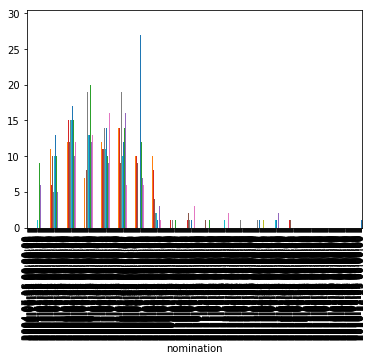

In [92]:
def preprocess_line(colum, lower=True):   
    pattern = '|'.join([re.escape(x) for x in string.punctuation])
    if lower:
        colum  = colum.str.lower()
    colum = colum.apply(lambda x: re.sub(pattern, '', x))    
    return colum

def preprocess_line_2(colum, lower=True):   
    pattern = '|'.join([re.escape(x) for x in string.punctuation])
    if lower:
        colum  = colum.str.lower()
    colum = colum.apply(lambda x: re.sub(pattern, ' ', x))
    
    return colum

def preprocess_line_3(colum, lower=True):   
    if lower:
        colum  = colum.str.lower()
    
    pattern = '\|(.*)'
    colum = colum.apply(lambda x: re.sub(pattern, '', x))
    
    pattern = '|'.join([re.escape(x) for x in string.punctuation])
    colum =colum.apply(lambda x: re.sub(pattern, ' ', x))
    return colum

def preprocess_line_4(column):
    column = column.str.lower()

    pattern = '\|(.*)'
    colum = colum.apply(lambda x: re.sub(pattern, '', x))

    pattern = '|'.join([re.escape(x) for x in string.punctuation])
    colum =colum.apply(lambda x: re.sub(pattern, ' ', x))
    
    pattern = 'film'
    colum = colum.apply(lambda x: re.sub(pattern, ' ', x))
    return colum

def preprocess_line_2(column):
    column = column.str.lower()
    pattern = '/archive1'
    column = column.apply(lambda x: re.sub(pattern, '', x))
    return column   
    



df_ends = pd.read_csv('./res/ends.csv', sep = ';', index_col=0)
df_nominations = pd.read_csv('./res/FAC_nomination.csv', sep=';', index_col=0)
print(df_ends.columns, '\n', df_nominations.columns)

print(f'nominations: {df_nominations.shape[0]}')
print(f'articles in ends: {df_ends.shape[0]}')

df_found_01 = pd.merge(df_nominations, df_ends, on='title')
df_not_found_01 = df_nominations.loc[~df_nominations.title.isin(df_ends.title),:]
print(f'found: {df_found_01.shape[0]}')
print(f'not found: {df_not_found_01.shape[0]}')
print(f'Sanity Check: {df_found_01.shape[0] + df_not_found_01.shape[0]} /{df_nominations.shape[0]}')

df_ends['title_prep'] = preprocess_line(df_ends.title) 
df_not_found_01['title_prep'] = preprocess_line(df_not_found_01.title)

df_found_02 = pd.merge(df_not_found_01, df_ends, on='title_prep')
df_not_found_02 = df_not_found_01.loc[~df_not_found_01.title_prep.isin(df_ends.title_prep)]
print(f'found: {df_found_02.shape[0]} /{ df_not_found_01.shape[0]}')
print(f'not found: {df_not_found_02.shape[0]}')

df_ends['title_prep'] = preprocess_line_2(df_ends.title) 
df_not_found_02['title_prep'] = preprocess_line_2(df_not_found_02.title)

df_found_03 = pd.merge(df_not_found_02, df_ends, on='title_prep')
df_not_found_03 = df_not_found_02.loc[~df_not_found_02.title_prep.isin(df_ends.title_prep)]
print(f'found: {df_found_03.shape[0]} /{ df_not_found_02.shape[0]}')
print(f'not found: {df_not_found_03.shape[0]}')

df_ends['title_prep'] = preprocess_line_3(df_ends.title) 
df_not_found_03['title_prep'] = preprocess_line_3(df_not_found_03.title)

df_found_04 = pd.merge(df_not_found_03, df_ends, on='title_prep')
df_not_found_04 = df_not_found_03.loc[~df_not_found_03.title_prep.isin(df_ends.title_prep)]
print(f'found: {df_found_04.shape[0]} /{ df_not_found_03.shape[0]}')
print(f'not found: {df_not_found_04.shape[0]}')

#display(
#df_ends.loc[df_ends.title_prep.str.contains('bidder')],
#df_not_found_02.loc[df_not_found_02.title_prep.str.contains('bidder')])


df_found_01['nomination'] = pd.to_datetime(df_found_01['nomination'])
df_found_01 = df_found_01.set_index('nomination')
df_found_ts = df_found_01['title'].resample('W').count()
df_found_ts.plot.bar()

In [156]:

display(df_not_found_04.iloc[0:10,])
display(df_ends.loc[df_ends.title_prep.str.contains('whale'),])

,title,nomination,last_comment,title_prep
82,User:Bishonen/Antique toilet paper holder,2005-02-10 09:52:00,2005-02-13 20:35:00,user bishonen antique toilet paper holder
136,2001: A Space Odyssey (film)|2001: A Space Ody...,2005-03-13 00:58:00,2005-07-22 15:23:00,2001 a space odyssey film
161,TV/FM DX,2005-04-25 20:52:00,2005-04-27 20:04:00,tv fm dx
182,I am cuba,2005-04-10 20:31:00,2005-04-11 20:06:00,i am cuba
189,Lodz Ghetto,2005-04-09 23:14:00,2005-04-10 10:29:00,lodz ghetto
201,New York City Subway nomenclature,2005-03-28 02:08:00,2005-04-03 19:04:00,new york city subway nomenclature
238,Kentucky Derby,2005-05-07 13:31:00,2005-05-22 21:24:00,kentucky derby
239,Alan Watts,2005-05-07 06:35:00,2005-05-10 19:57:00,alan watts
259,San Francisco-Oakland Bay Bridge,2005-04-26 07:11:00,2005-05-06 08:00:00,san francisco oakland bay bridge
263,Whale sound|Whale song,2005-05-02 02:45:00,2005-05-06 07:40:00,whale sound


,title,first,last,title_prep
594,Whale song,2005-05-02 02:46:53,2005-05-24 04:46:54,whale song
621,Blue Whale,2005-05-14 16:22:29,2005-05-19 06:51:56,blue whale
1666,Right whale,2006-05-02 12:20:46,2006-05-17 02:53:19,right whale
2319,Fin Whale,2006-10-03 07:38:37,2006-11-11 16:56:07,fin whale
2524,Sei Whale,2006-11-27 20:34:41,2006-12-20 16:07:21,sei whale
5183,James Whale,2009-01-16 01:55:36,2009-01-30 16:47:07,james whale
9105,Sperm whale/archive1,2013-08-04 17:24:51,2013-08-06 00:01:36,sperm whale archive1
10272,Whale/archive1,2015-09-11 02:09:05,2015-09-25 11:09:12,whale archive1
10510,Baleen whale/archive1,2016-03-20 23:58:06,2016-05-18 02:25:10,baleen whale archive1


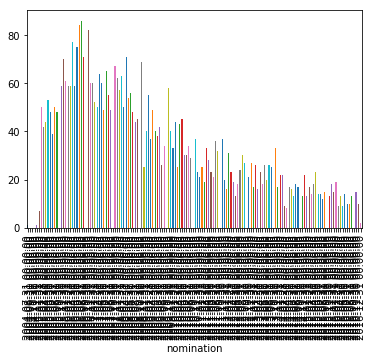

In [35]:
df = pd.read_csv('./res/FAC_nomination.csv', sep=';', parse_dates=['nomination', 'last_comment'], index_col =2)

s = df['title'].resample('M').count()

s.plot.bar()


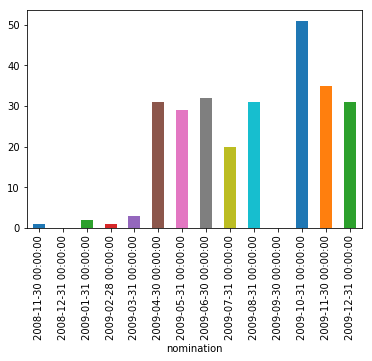

In [19]:
df_not_found = pd.read_csv('./res/not_found.csv', sep=';', parse_dates=['nomination', 'last_comment'], index_col=2)
s_not = df_not_found.loc['2008-11-01':'2009-12-31','title'].resample('M').count()
s_not.plot.bar()

In [20]:
print(df_ends['first'].min())
print(df_ends['first'].max())


df_nominations.loc[df_nominations.title.str.contains('Exmoor'),]

2003-06-24 22:56:53
2017-01-18 11:16:22


,title,nomination,last_comment


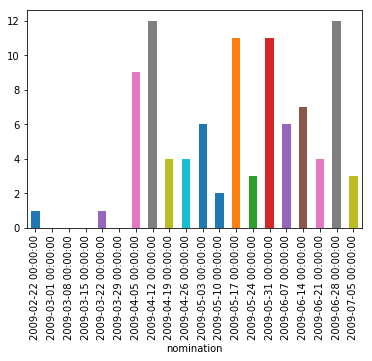

In [27]:
df_not_found = pd.read_csv('./res/not_found.csv', sep=';', parse_dates=['nomination', 'last_comment'], index_col=2)
s_not = df_not_found.loc['2009-02-01':'2009-06-30','title'].resample('w').count()
s_not.plot.bar()

In [68]:
df_not_found = pd.read_csv('./res/not_found.csv', sep=';', parse_dates=['nomination', 'last_comment'], index_col=2)
df_ends = pd.read_csv('./res/ends.csv', sep =';', parse_dates=['first', 'last'], index_col=2)


not_found_april = df_not_found.loc['2009-04':'2009-05',:]
ends_april = df_ends.loc['2009-04':'2009-05',:]

In [94]:
#df_nominations = pd.read_csv('./res/FAC_nomination.csv', sep=';', parse_dates=['nomination', 'last_comment'], index_col =2)
#not_found_april.head()
#df_nominations[df_nominations['title'].str.contains('Michigan')]
#df_ends[df_ends['title'].str.contains('Michigan')]

In [8]:
from pprint import  pprint
with open('./res/revision_dict.pkl', 'rb') as f:
    revision_dict = pickle.load(f)
    #pprint(revision_dict)
    

In [13]:
from revision import Revision
irl(revision)
Revision(page_title ='Augsburg', page_id = 37787, revision_id = 231564 , author_name = 'Jeronimo', author_id = 108)





NameError: name 'revision' is not defined